<a href="https://colab.research.google.com/github/Mrfrktmrck19/Data_Science/blob/master/ML_For_DS/ML3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DOĞRUSAL OLMAYAN REGRESYON MODELLERİ-NONLINEAR REGRESSION MODELS

* K En Yakın Komşu (KNN)
* Destek Vektör Regresyonu (SVR)
* Çok Katmanlı Algılayıcılar (ANN)
* Classification and Regression Trees (CART)
* Bagging (Bootstrap Aggregation)  (CART ile beraber ağaç yapılarının temelini oluşturur.)
* Random Forests (RF)
* Gradient Boosting Machines (GBM)
* Extreme Gradient Boosting (XGBoost)
* LightGBM (2016 by Microsoft)
* CatBoost (2017 by Yandex)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, ShuffleSplit, GridSearchCV, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import scale
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


## K NEAREST NEIGHBOUR (KNN)

### Teori

Tahminler, gözlem benzerliğine göre yapılır. Bana arkadaşını söyle sana kim olduğunu söyleyeyim. Parametrik olmayan bir öğrenme türüdür. Büyük veri setlerinde performans açısından çokta iyi değildir ama anlamsı kolaydır. Başta sınıflandırma problemleri için ortaya çıksa da zamanla regresyon içinde uyulanmaya başlamıştır. 

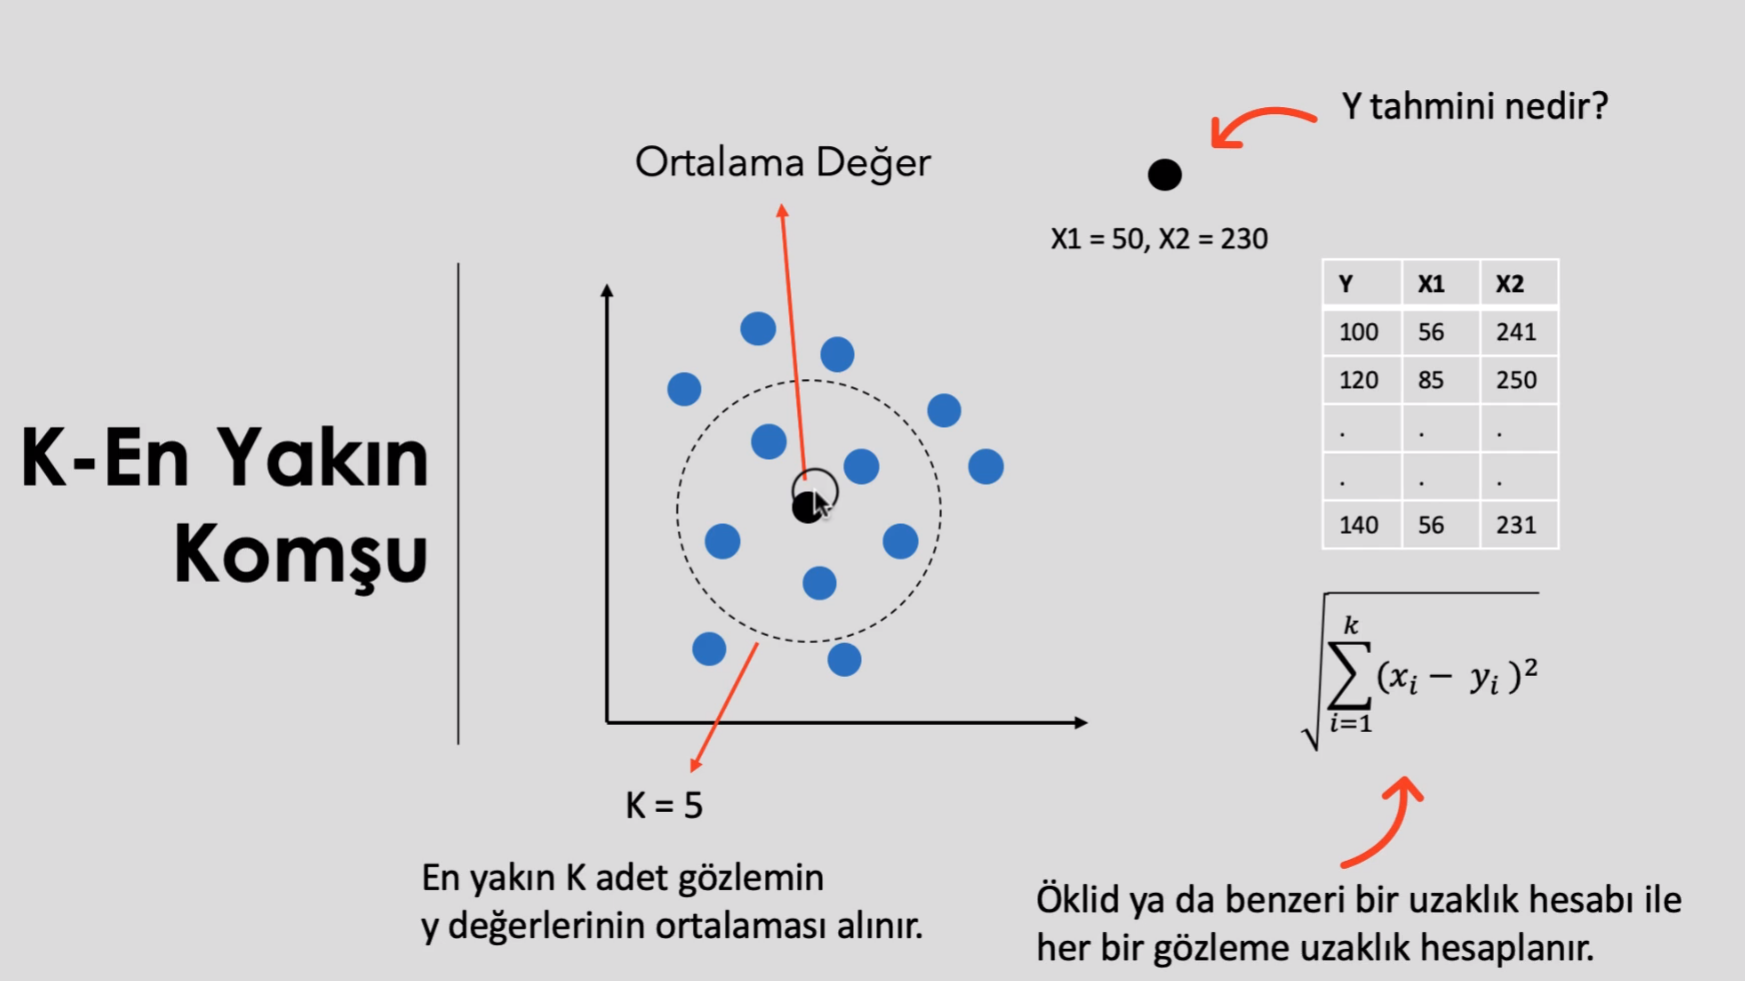

**KNN Basamakları:**
* Komşu sayısını belirle (K)
* Bilnmeyen nokta ile diğer tüm noktalar arasındaki uzaklıkları hesapla
* Uzaklıkları sırala ve en yakın gözlemlerdden K adet kadarını seç
* Sınıflandırma ise en sık sınıf, regresyon ise ortalama değeri tahmin değeri olarak ver.

### Uygulama

#### 1.Model

In [3]:
hits = pd.read_csv("/content/gdrive/MyDrive/Data Science/Kendi Yazılarım/Hitters.csv")
df = hits.copy()
df = df.dropna()
y = df["Salary"]
X_ = df.drop(["Salary","League","Division","NewLeague"], axis = 1).astype("float64")
ms = pd.get_dummies(df[["League","Division","NewLeague"]])
X = pd.concat([X_, ms[["League_N","Division_W","NewLeague_N"]]], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state= 42)

In [4]:
knn_model = KNeighborsRegressor().fit(X_train,y_train)

In [5]:
# k değerini bulalım, ayrıca k'nın bir hiperparametre olduğunu anlamışsındır.
knn_model.n_neighbors

5

#### 2.Tahmin

In [6]:
# k defaultta iken, yani 5 iken, test hatalarımıza bakalım.
print("Test Hatamız: ",np.sqrt(mean_squared_error(y_test,knn_model.predict(X_test))))
print("Açıklanabilirlik/r2:  ",r2_score(y_test,knn_model.predict(X_test)))

Test Hatamız:  426.6570764525201
Açıklanabilirlik/r2:   0.1590920400477076


In [7]:
# K değeri için hata gözlemini EĞİTİM SETİ ÜZERİNDE yapıyoruz
RMSE=[]

for k in range(10):
  k=k+1
  knn_model = KNeighborsRegressor(n_neighbors = k).fit(X_train,y_train)
  rmse = np.sqrt(mean_squared_error(y_train,knn_model.predict(X_train)))
  RMSE.append(rmse)
  print(f"K = {k} için RMSE değeri = {rmse}")

K = 1 için RMSE değeri = 0.0
K = 2 için RMSE değeri = 179.52761335480352
K = 3 için RMSE değeri = 205.20157172291863
K = 4 için RMSE değeri = 220.5139794876305
K = 5 için RMSE değeri = 239.6467132541376
K = 6 için RMSE değeri = 243.5904190007242
K = 7 için RMSE değeri = 258.1478781634636
K = 8 için RMSE değeri = 266.05374203349805
K = 9 için RMSE değeri = 269.73782093553376
K = 10 için RMSE değeri = 271.2798300436963


#### 3. Model Tuning

Cross val'i işin içine koyup farklı k değerleri üzerinden hesap yapıp daha doğru sonuçlara ulaşmaya çalışacağız.

K sayısının optimum değerini, GridSearchCV metodu ile bulacağız. Tüm makine öğrenmleri yöntemlerinde GridSearchCV yöntemi kullanılır, zaten bundan sonrada sıkça kullaancağız. Ridge,Lasso,ElasticNEt'te kullanmamızın sebebi onların kendisine ait fonksiyonarının olmasıydı. Fakat istersek kullanabiliriz.

GridSearchCV bir ızgara mantığıyla bir olası parametre setinin verilip tüm olası kombnasyonların denenmesi mantığı ile çalışır. Örneğin elimizde 2 adet parametre ve bunların veri seti olsun. Bu ikisinin çarpımıyla tüm veri seti ile birlikte olası tüm kombinasyonları ortaya serer ve en optime durumu bulur. 

Biz bir grid(ızgara ama liste diye anla) oluşturacağız. Bu liste içerisinde bir rama işlemi gerçekleştirilecek.

In [8]:
# algoritmadaki parametre adı nasılsa öyle vermen gerekir.
knn_params = {"n_neighbors": np.arange(1,30,1)}

In [9]:
knn = KNeighborsRegressor()
knn_cv_model = GridSearchCV(knn, knn_params, cv=10)

In [10]:
knn_cv_model.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])})

In [11]:
# en iyi parametreyi bulmak için
knn_cv_model.best_params_["n_neighbors"]

8

In [12]:
RMSE = []
RMSE_CV = [] # valide edilmiş ve edilmemiş hallerini karşılaştıracağız
for k in range(10):
  k = k+1
  knn_model = KNeighborsRegressor(n_neighbors= k).fit(X_train,y_train)
  rmse = np.sqrt(mean_squared_error(y_train,knn_model.predict(X_train)))
  rmse_cv = np.sqrt(-1*cross_val_score(knn_model, X_train, y_train, cv=10, scoring="neg_mean_squared_error").mean())
  RMSE.append(rmse)
  RMSE_CV.append(rmse_cv)
  print(f"K = {k} için RMSE değeri = {rmse}, RMSE_CV değeri = {rmse_cv}")

K = 1 için RMSE değeri = 0.0, RMSE_CV değeri = 325.3947514706382
K = 2 için RMSE değeri = 179.52761335480352, RMSE_CV değeri = 293.24000183333817
K = 3 için RMSE değeri = 205.20157172291863, RMSE_CV değeri = 283.7486667487823
K = 4 için RMSE değeri = 220.5139794876305, RMSE_CV değeri = 286.3240222024089
K = 5 için RMSE değeri = 239.6467132541376, RMSE_CV değeri = 290.0705466132226
K = 6 için RMSE değeri = 243.5904190007242, RMSE_CV değeri = 298.1263115575851
K = 7 için RMSE değeri = 258.1478781634636, RMSE_CV değeri = 294.77070479194987
K = 8 için RMSE değeri = 266.05374203349805, RMSE_CV değeri = 291.98672028891235
K = 9 için RMSE değeri = 269.73782093553376, RMSE_CV değeri = 295.7162739573105
K = 10 için RMSE değeri = 271.2798300436963, RMSE_CV değeri = 301.31047022701154


Valide edilmişte gördüğün gibi, standart sapma daha düzgün. Daha doğru. Küçük olan daha yanıltıcı! Valide edilmemişte 2.ye baktığında 179 çok iyi bir değer ama valide ettikten sonra bakınca en küçük değerin o olamdığı anlaşılıyor. 

In [13]:
knn_tuned = KNeighborsRegressor(n_neighbors = knn_cv_model.best_params_["n_neighbors"]).fit(X_train,y_train)

In [14]:
print("Tune edilen modelin test hatası: ", np.sqrt(mean_squared_error(y_test,knn_tuned.predict(X_test))))
print("Tune edilen modelin Açıklanabilirliği/r2: ", r2_score(y_test,knn_tuned.predict(X_test)))

Tune edilen modelin test hatası:  413.7094731463598
Tune edilen modelin Açıklanabilirliği/r2:  0.2093550739421146


## SUPPORT VECTOR REGRESSION-SVR

### Teori

Amaç bir marjın aralığına, maksimum noktayı en küçük hata ile alabilecek şekilde doğru ya da eğriyi belirlemektir. Bu da classification için çıkmış daha sonra regresyon için uygulanmştır. Güçlü ve esnek bir modelleme tekniğidir. Regrsyon problemlerine uygulandığında Robust Regresyon alanında ciddi bir yer edinmiştir.

Robust Algoritmalar: Veri setindeki aykrıı değerlere daha duyarsız ya da başka bir tabirle daha dayanıklı algoritmalara robust algoritmalar denir. SVR'ın aykırı gözlemlerdeki yaklaşımı, SVR'ı bir robust yöntemi olarakta anılmasını sağlamaktadır.

-Smola(1996) & Drucker(1997)

ε = epsilon, kabul edilebilir hata miktarı. ξ = ksi, aykırı değerler.

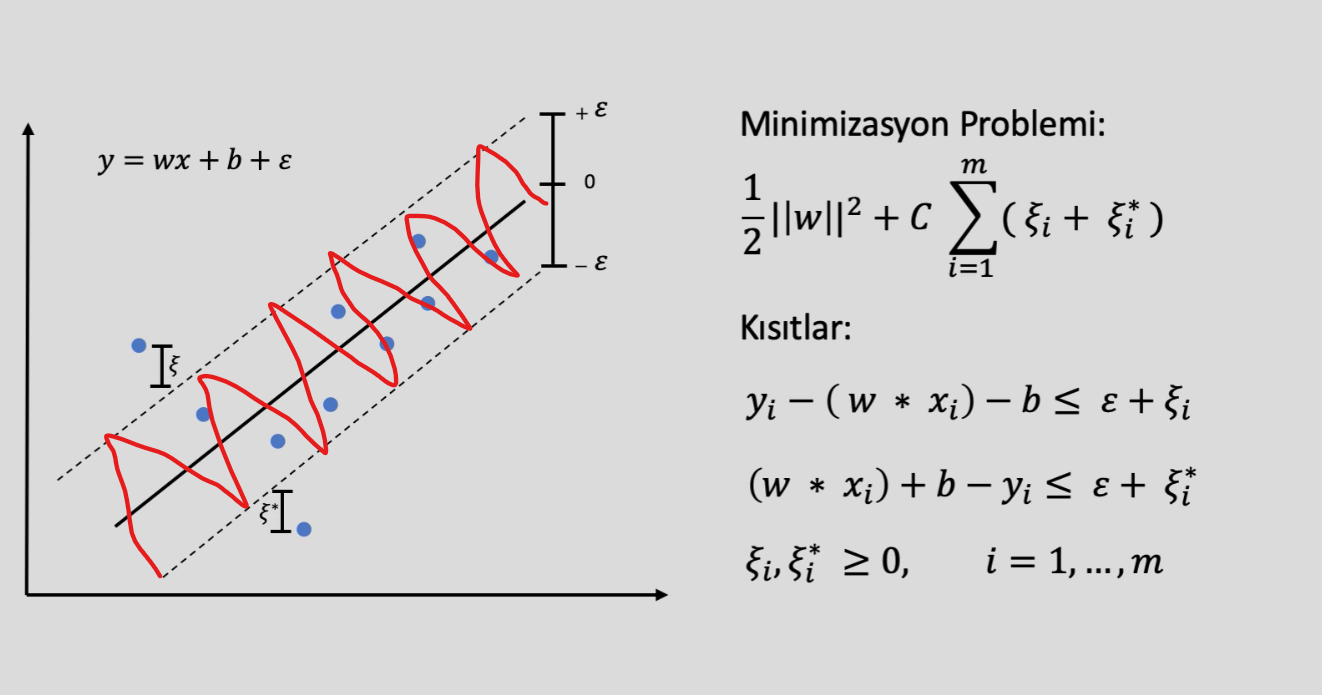

Minimizasyon probleindeki "C" değeri "Karmaşıklık" ya da "Ceza" parametresi olarak adlandırılır. Ksi değerler aykırı değerleri temsil ediyor. Ceza/Karmaşıklık parametresi ile biz bu aykırı değerler üzerinde bir kontrol mekanizması elde etmiş olup ksilerin değerlerine etki edebiliyoruz.

Kısıtların anlamı:

Öyle bir regresyon denklemi bulmana yardımcı olacağım ki; gerçek değerler ile tahmin edilen değerler arasındaki farklar, belirli bir epsilon ve ksi değerlerinin toplamından daha uzakta olmayacak. Bu kısıtları kullanarak regresyon denklmimizi bulacağız, bu denklemde bize eğriyi verecek. 

Bu aykırı gözlemeler, ksiler, regresyon doğrusunun eğimini/şeklini de belirliyor. Mantık: Bizim kabul edilebilir bir hata sınırımız var, bu hata sınırnın altındakiler de sorun yok zaten elimizde. Hata sınırının üstündekiler, yani aykırı değerler, elimizde olmadığı için reg doğrusu oraya doğru şekilleniyor. Tabi doğrunun eğimi/şekli komple aykırı değerlere bırakılmıyor, ceza parametresi burada işin içine giriyor.

### Uygulama- Doğrusal SVR

#### 1.Model

Burada SVR'ı doğrusal olan ve olmayan olarak 2 şekilde ele alacağız.

In [15]:
hit = pd.read_csv("/content/gdrive/MyDrive/Data Science/Kendi Yazılarım/Hitters.csv")
df = hit.copy()
df = df.dropna()
y = df["Salary"]
ms = pd.get_dummies(df[["League","Division","NewLeague"]])
X_ = df.drop(["Salary","League","Division","NewLeague"], axis = 1).astype("float64")
X = pd.concat([X_, ms[["League_N","Division_W","NewLeague_N"]]], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

In [16]:
X_train = pd.DataFrame(X_train["Hits"])
X_test = pd.DataFrame(X_test["Hits"])

In [17]:
from sklearn.svm import SVR

In [18]:
svr_model = SVR(kernel = "linear").fit(X_train, y_train)

In [19]:
svr_model.predict(X_train)[0:5]

array([403.52804878, 666.91219512, 706.66829268, 194.80853659,
       423.40609756])

In [20]:
print ("y = {0} + {1} x".format(svr_model.intercept_[0], 
                                svr_model.coef_[0][0])) 

y = -48.69756097561513 + 4.969512195122093 x


In [21]:
X_train["Hits"][0:1]

183    91.0
Name: Hits, dtype: float64

In [22]:
-48.69756097561513 + 4.969512195122093*91

403.5280487804953

In [23]:
y_pred = svr_model.predict(X_train)

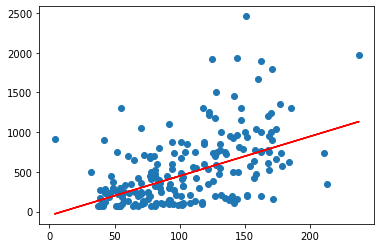

In [24]:
plt.scatter(X_train, y_train)
plt.plot(X_train,y_pred, color = "r")

In [25]:
from sklearn.linear_model import LinearRegression
lm_model = LinearRegression().fit(X_train, y_train)
lm_pred  = lm_model.predict(X_train)
print("y = {0} + {1} x".format(lm_model.intercept_, lm_model.coef_[0]))

y = -8.814095480334345 + 5.172456135470686 x


In [26]:
-8.814095480334572 + 5.1724561354706875*91

461.879412847498

Text(0, 0.5, 'Maaş (Salary)')

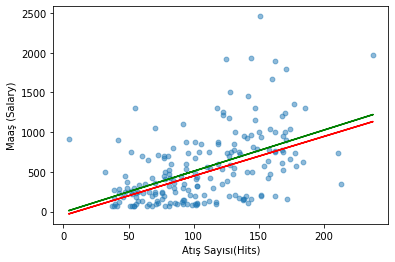

In [27]:
plt.scatter(X_train, y_train, alpha=0.5, s=23)
plt.plot(X_train, lm_pred, 'g')
plt.plot(X_train, y_pred, color='r')

plt.xlabel("Atış Sayısı(Hits)")
plt.ylabel("Maaş (Salary)")

Grafikte üstte olan LR, altta olan SVR. Nasıl biliyoruz? Outlier değerlere baktığımzıda, grafikte üstte outlierlar var. Doğrular oraya doğru yaklaşmaya daha eğilimlidir. Fakat SVR robust bir algoritma olduğu, yani outlierlardan etkilenmeyen algritma,için etkilenmez ve daha doğru bir sonuç oluşturur.

#### 2.Tahmin

In [28]:
print ("y = {0} + {1} x".format(svr_model.intercept_[0], svr_model.coef_[0][0])) 

y = -48.69756097561513 + 4.969512195122093 x


In [29]:
svr_model.predict([[91]])

array([403.52804878])

In [30]:
y_pred = svr_model.predict(X_test)

In [31]:
np.sqrt(mean_squared_error(y_test, y_pred))

459.0187960365147

In [32]:
svr_model 

SVR(kernel='linear')

In [33]:
svr_params = {"C": np.arange(0.1,2,0.1)}
svr_cv_model = GridSearchCV(svr_model, svr_params, cv = 10).fit(X_train,y_train)

In [34]:
pd.Series(svr_cv_model.best_params_)[0]

0.1

In [35]:
svr_tuned = SVR(kernel = "linear", 
                C = pd.Series(svr_cv_model.best_params_)[0]).fit(X_train, y_train)

In [36]:
y_pred = svr_tuned.predict(X_test)

In [37]:
np.sqrt(mean_squared_error(y_test, y_pred))

458.198966781116

### Uygulama - Doğrusal Olmayan SVR

#### 1.Model

In [38]:
# Doğrusal olmayan SVR'ıda Lineer Regresyon ile karşılaştıralım, ki daha iyi anlayalım
np.random.seed(3)

x_sim = np.random.uniform(2, 10, 145)
y_sim = np.sin(x_sim) + np.random.normal(0, 0.4, 145)

x_outliers = np.arange(2.5, 5, 0.5)
y_outliers = -5*np.ones(5)

x_sim_idx = np.argsort(np.concatenate([x_sim, x_outliers]))
x_sim = np.concatenate([x_sim, x_outliers])[x_sim_idx]
y_sim = np.concatenate([y_sim, y_outliers])[x_sim_idx]

In [39]:
from sklearn.linear_model import LinearRegression
ols = LinearRegression()
ols.fit(np.sin(x_sim[:, np.newaxis]), y_sim)
ols_pred = ols.predict(np.sin(x_sim[:, np.newaxis]))

from sklearn.svm import SVR
eps = 0.1
svr = SVR(kernel ='rbf', epsilon = eps)                        # radial basis function
svr.fit(x_sim[:, np.newaxis], y_sim)
svr_pred = svr.predict(x_sim[:, np.newaxis])

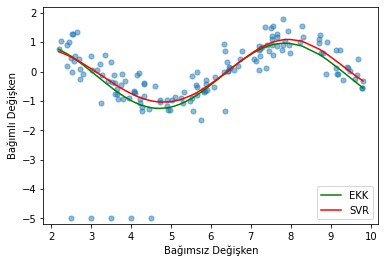

In [40]:
plt.scatter(x_sim, y_sim, alpha=0.5, s=26)
plt_ols, = plt.plot(x_sim, ols_pred, 'g')
plt_svr, = plt.plot(x_sim, svr_pred, color='r')
plt.xlabel("Bağımsız Değişken")
plt.ylabel("Bağımlı Değişken")
plt.ylim(-5.2, 2.2)
plt.legend([plt_ols, plt_svr], ['EKK', 'SVR'], loc = 4);

In [41]:
hit = pd.read_csv("/content/gdrive/MyDrive/Data Science/Kendi Yazılarım/Hitters.csv")
df = hit.copy()
df = df.dropna()
y = df["Salary"]
ms = pd.get_dummies(df[["League","Division","NewLeague"]])
X_ = df.drop(["Salary","League","Division","NewLeague"], axis = 1).astype("float64")
X = pd.concat([X_, ms[["League_N","Division_W","NewLeague_N"]]], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

svr_rbf = SVR(kernel="rbf").fit(X_train, y_train)

#### 2.Tahmin

In [42]:
y_pred = svr_rbf.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))


460.0032657244849

#### 3.Model Tunning

In [43]:
svr_rbf

SVR()

In [44]:
svr_params = {"C": [0.01, 0.1,0.4,5,10,20,30,40,50]}
svr_cv_model = GridSearchCV(svr_rbf,svr_params, cv = 10)
svr_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVR(),
             param_grid={'C': [0.01, 0.1, 0.4, 5, 10, 20, 30, 40, 50]})

In [45]:
pd.Series(svr_cv_model.best_params_)[0]

50

In [46]:
svr_tuned = SVR(kernel="rbf", C = pd.Series(svr_cv_model.best_params_)[0]).fit(X_train, 
                                                                        y_train)


In [47]:
y_pred = svr_tuned.predict(X_test)

np.sqrt(mean_squared_error(y_test, y_pred))

428.00406888095694

## ARTIFICIAL NEURAL NETWORK - ANN

Burasını kendi notlarımdan hallettim, ders yetersizdi.

### Uygulama

#### 1.Model

In [48]:
hit = pd.read_csv("/content/gdrive/MyDrive/Data Science/Kendi Yazılarım/Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [49]:
from sklearn.preprocessing import StandardScaler

In [50]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

.fit(X_train) dediğimizde , X veri setinin standart sapması ve ortalaması hesaplanıyor.

.transform(X_train) dediğimizde bu hesaplanan standart sapma ve ortalamaya göre scale ediyor.

.transform(X_test) dediğimizde test veri setini train'in standart sapması ve ortalamasına göre scale ediyor. Yani kullanımda bir yanlışlık yok.



Biz burda fit_transform(X_train) ve fit_transform(X_test) deseydik , örneğin X_traindeki 20 değeri 0.12 ye sabitlenirken,  X_test'teki 20 değeri 0.17 olurdu. Ama böyle tek bir veri setini örnek aldığımızda ikiside aynı değere sabitleniyor.

---
edit: Benim anladigima gore, scaler.fit(X_train) yaptigimiz zaman, scaler 'objesi' (terimi yanlis kullaniyor olabilirim) X_train data seti uzerinden X_train verilerine gore standartlastirmanin nasil olmasi gerektigini ogreniyor.



Daha sonra ogrenimi uygulumaya sokmak adina transform()' u kullaniyoruz.

scaler 'objesi' zaten standartlastirma nasil yapildigini X_train datasina gore ogrendigi icin transform() 'u direk X_test uzerinde uygulayabiliyoruz.



X_train ve X_test aslinda zaten bir veri setinin bolunmus hali oldugu icin X_test uzerinde scaler'a bir daha standartlastirmanin nasil yapilmasi gerektigini ogretmiyoruz (bir daha fit() ettirmiyoruz) --> burasi biraz benim cikarimim oldu



ingilizce olarak ben bu kaynaktan cikarabildiklerimi yazdim. Umarim dogru anlamisimdir ve mantikli geliyordur. Hocamiz teyit edebilirse daha iyi olacaktir. Iyi calismalar

https://datascience.stackexchange.com/questions/12321/difference-between-fit-and-fit-transform-in-scikit-learn-models



In [51]:
X_train_scaled = scaler.transform(X_train)

In [52]:
X_test_scaled = scaler.transform(X_test)

In [53]:
from sklearn.neural_network import MLPRegressor

In [54]:
mlp_model = MLPRegressor(hidden_layer_sizes = (100,20)).fit(X_train_scaled, y_train)


In [55]:
mlp_model

MLPRegressor(hidden_layer_sizes=(100, 20))

In [56]:
mlp_model.n_layers_

4

In [57]:
mlp_model.hidden_layer_sizes

(100, 20)

#### 2.Tahmin

In [58]:
y_pred = mlp_model.predict(X_test_scaled)
np.sqrt(mean_squared_error(y_test, y_pred))

527.4270090447499

#### 3.Model Tuning

In [59]:
mlp_model

MLPRegressor(hidden_layer_sizes=(100, 20))

In [60]:
mlp_params = {'alpha': [0.1, 0.01,0.02,0.005],
             'hidden_layer_sizes': [(20,20),(100,50,150),(300,200,150)],
             'activation': ['relu','logistic']}

In [61]:
mlp_cv_model = GridSearchCV(mlp_model, mlp_params, cv = 10)

In [62]:
mlp_cv_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=MLPRegressor(hidden_layer_sizes=(100, 20)),
             param_grid={'activation': ['relu', 'logistic'],
                         'alpha': [0.1, 0.01, 0.02, 0.005],
                         'hidden_layer_sizes': [(20, 20), (100, 50, 150),
                                                (300, 200, 150)]})

In [63]:
mlp_cv_model.best_params_

{'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (100, 50, 150)}

In [64]:
mlp_tuned = MLPRegressor(alpha = 0.02, hidden_layer_sizes = (100,50,150)) # aktivasyon fonksiyonu ön tanımlı olarak relu old için yazmıyoruz

In [65]:
mlp_tuned.fit(X_train_scaled, y_train)

MLPRegressor(alpha=0.02, hidden_layer_sizes=(100, 50, 150))

In [66]:
y_pred = mlp_tuned.predict(X_test_scaled)

In [67]:
np.sqrt(mean_squared_error(y_test, y_pred))

361.77739022461884

## CLASSIFICATION & REGRESSION TREES - CART 

### Teori

Metodolojik olarak artık farklı bir bölümdeyiz, karar ağaçlarındayız. Konunun anlaşılması için tekli ağaç yapılarından çklu ağaç yapılarına gidilecek şekilde ilerleyeceğiz. İlk ele alacağımız tekli ağaç yapısı, aynı zamanda en eskisi ve en bilinen, CART (Brieman 1984). Random Forest algoritması içerisinde CART algoritmasını kullanır.

Amaç, veri seti içerisindeki karmaşık yapıalrı basit karar yapılarına dönüştürmektir. Heteroje veri setleri belirlenmiş bir hedef değişkene göre homojen alt gruplara ayrılır.

CART tekniği, gelişmiş ağaç tekniklerine göre yeteriz olsada onların çıkış nktası olduğu için önemlidir. 

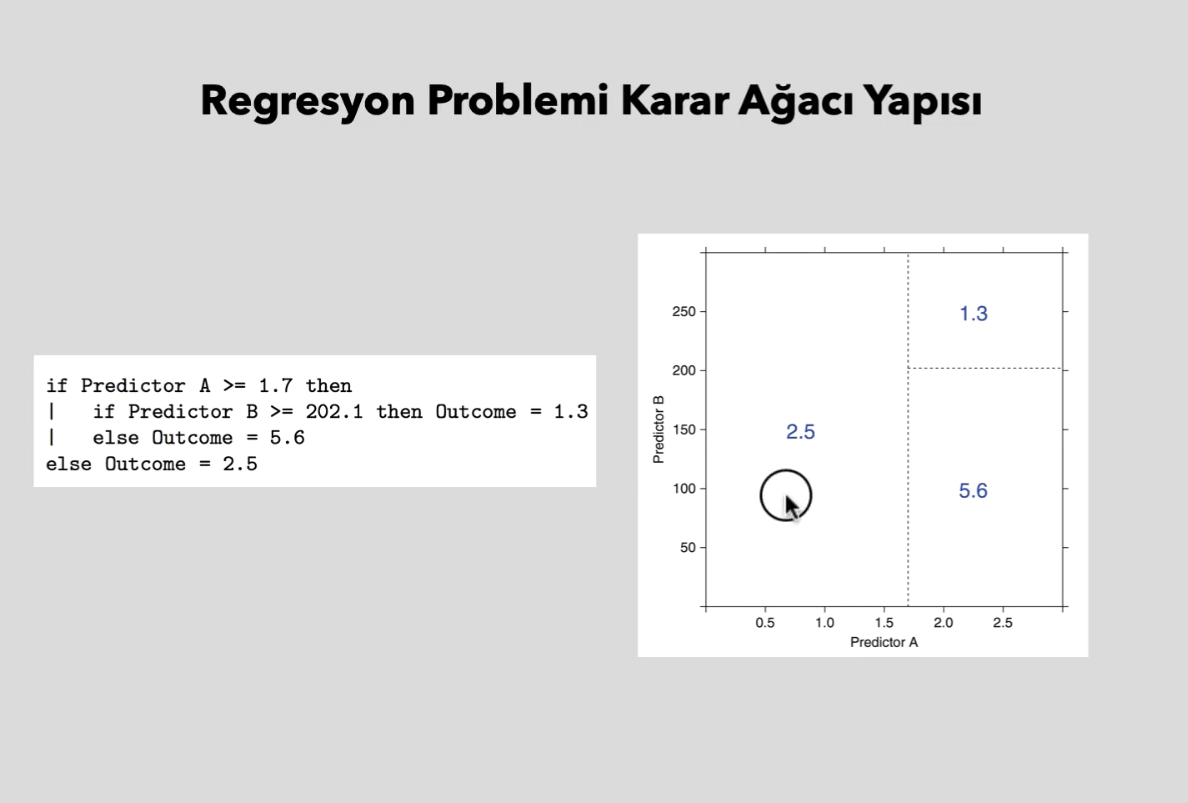

Not: Aşırı dallanma normalde overfittinge sebep oluyor. Fakat Brieman bir yöntem bularak overfittingin önüne geçmiş, Budama Yöntemi. Tahmin edebileceğin üzere bir Karmaşıklık Parametresi belirleniyor ve bu parametre üzerinden bazı dalların kesilmesi sağlanıyor. Tabi ki optimum parametreyi bulurken karşımıza GridSearchCV el sallıyor :) Aynı zamanda bölünmenin nerede duracağını belirlemek, dallanmanın duracağı nokta, EKK değerinin belli bir seviye altına düştükten sonra durdurulması gibi işlenebilmektedir.

Kuracak olduğumuz modelin genellenebilirlik kaygısı yoksa, veri setinin varyansı, varyasyonu bu single thread ağaç yöntemleri oldukça başarılıdır. Mevcut veri setinin varyyasyonlarına ayırıp kullandığı için oldukça başarılı sonuçlar elde etmektedir. Ama sen bunu şirketin tamamı ya da ülkenin tamamında kullanmak istersen, yani başta dediğimiz genelleme, o zaman yanlış sonuçlar alırsın. Çünkü veri setin kadar varyasyon üretebilirsin. Internal modelse öyle kalsın, farklı algoritmalara kayma.

Ne zaman CART kullanılır? Genellenebilirlik kaygın yok ise, kullanılması, uygulanması, sonuçların değerlendirilmesi ve başarılı tahmin veriyor olması sebebiyle çoğu yerde ve zamanda kullanabilirsin ama internal model internalda kalmalı dışarı açılırsa hatalı sonuçlar üretir.

Rassalığı bozuğundan dolayı genellenemiyor btw.

### Uygulama

#### 1.Model

In [68]:
hit = pd.read_csv("/content/gdrive/MyDrive/Data Science/Kendi Yazılarım/Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [69]:
X_train = pd.DataFrame(X_train["Hits"])
# salary değişkenini modelleyip eksenlerdeki durumu göstermek için seçiyotuz.
X_test = pd.DataFrame(X_test["Hits"])

In [70]:
cart_model = DecisionTreeRegressor()

In [71]:
?cart_model

In [72]:
cart_model.fit(X_train, y_train)

DecisionTreeRegressor()

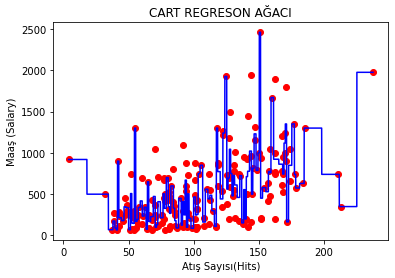

In [73]:
X_grid = np.arange(min(np.array(X_train)),max(np.array(X_train)), 0.01) 
X_grid = X_grid.reshape((len(X_grid), 1))  
plt.scatter(X_train, y_train, color = 'red') 
plt.plot(X_grid, cart_model.predict(X_grid), color = 'blue')  
plt.title('CART REGRESON AĞACI')  
plt.xlabel('Atış Sayısı(Hits)') 
plt.ylabel('Maaş (Salary)') ;

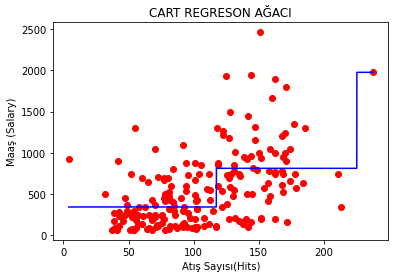

In [74]:
# dallanma sayısını 3 yapalım
cart_model = DecisionTreeRegressor(max_leaf_nodes=3)
cart_model.fit(X_train, y_train)
X_grid = np.arange(min(np.array(X_train)),max(np.array(X_train)), 0.01) 
X_grid = X_grid.reshape((len(X_grid), 1))  
plt.scatter(X_train, y_train, color = 'red') 
plt.plot(X_grid, cart_model.predict(X_grid), color = 'blue')  
plt.title('CART REGRESON AĞACI')  
plt.xlabel('Atış Sayısı(Hits)') 
plt.ylabel('Maaş (Salary)') ;

Hyper parametremiz leaf olacak anlamışsındır.

Tıbbi dersindende hatırlayacağın üzere, Gini de bir kural seti çıkıyordu. Aynısı tüm ağaçlar için geçerli. Bu kural setine erişelim hemde pythonda kulanılabilecek versiyonuna. Bunun için bir kütüphane indirmemiz gerekiyor:

In [75]:
!pip install skompiler

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 KB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for skompiler: filename=SKompiler-0.7-py3-none-any.whl size=54331 sha256=9e283d5654defcb4b0ae340534630e37366fcd3a97c5bf9b8fa057524e7c0248
  Stored in directory: /root/.cache/pip/wheels/eb/73/c6/cf0fc98d965e01e8bb3b1923d1e6a57374645d5d055f00e898
Successfully built skompiler


In [76]:
!pip install SKompiler[full]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [77]:
from skompiler import skompile

In [78]:
print(skompile(cart_model.predict).to("python/code"))
# bize bir karar kural seti döndürecek

(345.2011551724138 if x[0] <= 117.5 else 813.0988 if x[0] <= 225.5 else 1975.0)



#### 2.Tahmin

In [79]:
x = [380]
(345.2011551724138 if x[0] <= 117.5 else 813.0988 if x[0] <= 225.5 else 1975.0)


1975.0

In [80]:
cart_model.predict([[300]])

array([1975.])

In [81]:
cart_model.predict(X_test)[0:5]

array([813.0988    , 813.0988    , 813.0988    , 345.20115517,
       345.20115517])

In [82]:
np.sqrt(mean_squared_error(y_test,cart_model.predict(X_test)))

460.0663148428844

#### 4.Model Tuning

In [83]:
cart_model = DecisionTreeRegressor(max_leaf_nodes=5,min_samples_split=10)
cart_model.fit(X_train, y_train)
y_pred = cart_model.predict(X_test)

np.sqrt(mean_squared_error(y_test, y_pred))

479.5201716052201

In [84]:
cart_params = {"min_samples_split": range(2,100),
               "max_leaf_nodes": range(2,10)}

cart_cv_model = GridSearchCV(cart_model, cart_params, cv = 10)

In [85]:
cart_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=DecisionTreeRegressor(max_leaf_nodes=5,
                                             min_samples_split=10),
             param_grid={'max_leaf_nodes': range(2, 10),
                         'min_samples_split': range(2, 100)})

In [86]:
cart_cv_model.best_params_

{'max_leaf_nodes': 9, 'min_samples_split': 76}

In [87]:
cart_tuned = DecisionTreeRegressor(max_leaf_nodes = 9, min_samples_split = 37)

In [88]:
cart_tuned.fit(X_train, y_train)

DecisionTreeRegressor(max_leaf_nodes=9, min_samples_split=37)

In [89]:
y_pred = cart_tuned.predict(X_test)

In [90]:
np.sqrt(mean_squared_error(y_test, y_pred))

434.2326688144208

## Bagging Trees

### Teori

Temeli bootsrtap(rastgele örnekleme) yontemi ile oluşturulan birden fazla karar ağacının ürettiği tahminlerin bir araya getirilerek değerlendirilmesine dayanır. CART'tan 10 tane oluşurup, modellerin çıktılarının değerlendirildiğini düşünebilirsin. (Brieman 1996)

Bu bölümde Topluluk Öğrenme Yöntemlerine girmiş oluyoruz. Topluluk Öğrenme Yöntemleri ikiye ayrılır; internal ve external. Modelleirn kendi içerisinde topluluk öğrenme kurallarını taşıması, ki bu Bagging, Random Forest, XGBoost, GBM gibi olan ağaç türleridir. İçerisinde birden fazla ağaç olması söz konusudur.

Bir de birden fazla algoritmanın bir araya gelerek bu algoritmaların beraber bir modelleme problemi üzerinde çalışması var, ki buda external olan.

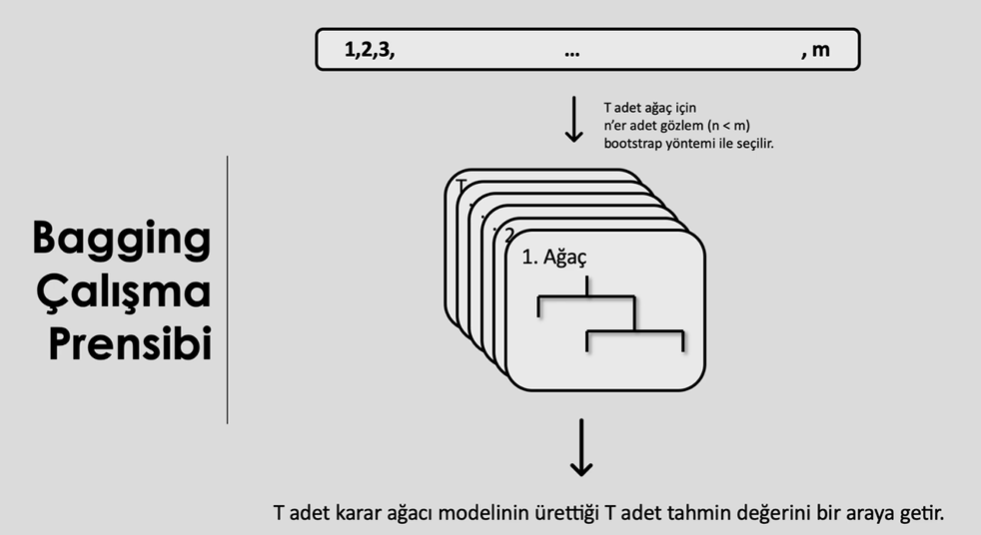

Oluşturulan T adet kadar ağacın, daha öncesinde oluşturulmuş ağaçlar ile bir bağımlılığı yoktur! Örneklerin her bir ağacın oluşturulamsında kullanılamsı  şansı eşittir.

Çekilen ölrenklerin 2/3'ü ağaçların oluşması, geri kalan ağaçların performansının test edilmesi için kullanılır.

Diğer ağaç türleri gibi EKK'yı düşürmeyi hedefler ve varyansı düşürerek ezberlemenin öüne geçmesini sağlayan bir yapısı vardır. CART'ta ezbere karşı budama yapıyorduk tamam fakat rassallığı tam olarak sağlayamıyrduk. Bagging bu rassallığı sağlıyor. Zaten en büyük avantajından biriside bu rassalığı sağlaması.

### Uygulama

#### 1.Model

In [94]:
hits = pd.read_csv("/content/gdrive/MyDrive/Data Science/Kendi Yazılarım/Hitters.csv")
df = hits.copy()
df = df.dropna()
y = df["Salary"]
ms = pd.get_dummies(df[["League","Division","NewLeague"]]).astype("float64")
X_ = df.drop(["Salary","League","Division","NewLeague"], axis = 1)
X = pd.concat([X_, ms[["League_N","Division_W","NewLeague_N"]]],axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

In [95]:
bag_model = BaggingRegressor(bootstrap_features = True)
bag_model.fit(X_train, y_train)

BaggingRegressor(bootstrap_features=True)

In [97]:
bag_model.n_estimators # kaç ağaç olduğu

10

In [98]:
bag_model.estimators_

[DecisionTreeRegressor(random_state=1686320658),
 DecisionTreeRegressor(random_state=2106270115),
 DecisionTreeRegressor(random_state=604160287),
 DecisionTreeRegressor(random_state=1818112300),
 DecisionTreeRegressor(random_state=1144551074),
 DecisionTreeRegressor(random_state=1634764234),
 DecisionTreeRegressor(random_state=820974251),
 DecisionTreeRegressor(random_state=1387516839),
 DecisionTreeRegressor(random_state=2009973545),
 DecisionTreeRegressor(random_state=1391412095)]

In [100]:
bag_model.estimators_samples_  # her bir ağaçttaki örnekler

[array([175, 142,  67, 175,  63,  74,  42, 124, 165, 168,  50, 105,  87,
        122,  11,  42, 155, 191,  83, 175,  96,  59,  71,  70, 172, 113,
        119, 169, 192,   7, 104, 126, 179, 153,  50,  43,  12,  24,  42,
        170, 173, 169,  43,  89,  91, 196,  17,  52,  67, 125, 128,  33,
        180, 143, 149,  64, 144, 191,  65,   9,  87, 180,  83, 137, 130,
        103, 137, 151, 119, 174, 105, 133,  65,  16,  41,   5,  18, 177,
        140,  36, 126, 142,  57, 150, 172,  32, 123,  64, 168,   0, 126,
          8, 116,  85,  19,   7,  28, 194, 146, 143, 153,  34,  19,  91,
        137, 172,  11,  65,  48,  75,  42,  65, 108, 184, 174,  81, 125,
         27,  12,  71,  98, 186,   5,  92, 178, 162,  12,  28, 138,  65,
         22, 117, 160, 145, 177, 155, 164, 184, 125,  98,  40, 131, 159,
        188, 193,  87,  71, 147, 196, 184,  76, 139,  22,  33,  48, 105,
         86, 166, 158,  57, 179, 139, 177,  31,  29, 142,  72, 139,  47,
         74,   6, 116, 118,  76,  80, 143, 144,  76

In [101]:
# her bir ağacon bağımsız değişkenlri
bag_model.estimators_features_

[array([18, 16,  6,  7, 10,  8,  3, 11,  2,  1, 11,  8,  6,  4,  1, 14, 16,
        15, 18]),
 array([ 3, 14,  7, 11,  0, 18,  4,  8, 12,  4, 14, 14,  4, 14, 13,  4,  4,
         6, 15]),
 array([ 4, 15, 16,  9, 11, 18,  5, 14,  6, 17,  3, 12,  2,  5,  2,  4,  0,
         9, 14]),
 array([12,  9,  7, 13, 18, 11, 13,  0,  4, 13, 10,  1,  8, 17, 14, 13, 13,
        13, 11]),
 array([ 2, 15,  3, 14,  2,  5,  5, 12, 15, 18,  1,  1, 18,  8, 12,  7,  0,
        18,  3]),
 array([10, 18,  2,  1,  8, 17,  1, 14, 15, 13, 13,  0, 15, 13, 13, 14, 15,
        18,  1]),
 array([11, 16,  7,  6, 17,  9, 14,  4,  9,  9,  2,  5, 17,  3, 10, 11,  6,
        11,  8]),
 array([ 7,  7, 17,  2,  7,  5, 10, 13,  9,  5, 16, 18, 17,  8, 13, 16, 12,
         6, 12]),
 array([ 9,  0, 12,  8,  0, 16,  0,  3,  5, 15, 17, 10,  2,  9,  5,  0, 11,
        14,  7]),
 array([17, 11, 17,  1, 13,  9, 15,  8, 15,  7,  4,  4,  2, 11, 17, 11, 15,
        13, 10])]

In [104]:
# her bir modele özel değerler
bag_model.estimators_[0]
bag_model.estimators_[0:3]

[DecisionTreeRegressor(random_state=1686320658),
 DecisionTreeRegressor(random_state=2106270115),
 DecisionTreeRegressor(random_state=604160287)]

#### 2.Tahmin

In [105]:
# ilkel test hatası:
y_pred = bag_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

320.38327104200926

Bu test değeri, topluluktaki her bir ağacın bir araya gtirilerek oluşturulan bir test değeri. Şimdide tüm ağaçlarla değilde, bir ve daha fazla ağacın bir araya gelmesiyle oluşan test hatalarına bakalım.

In [106]:
# ikinci ağaca gidelim.
second_bagging_tree_pred = bag_model.estimators_[1].fit(X_train,y_train).predict(X_test)
np.sqrt(mean_squared_error(y_test,second_bagging_tree_pred))

445.7674062884888

Tahmin edeceğin üzere model tuningde bu ağaçalrın elemelerini yapacğız.

In [109]:
# 7. ağaca gidelim.
seventh_bagging_tree_pred = bag_model.estimators_[6].fit(X_train,y_train).predict(X_test)
np.sqrt(mean_squared_error(y_test,seventh_bagging_tree_pred))

472.7738179885811

#### 3.Model Tuning

Baggingi aslında bir metodoloji olarak görmek gerekiyor. Bag etmek= bootstap birleştirmeleri yapmak olarak düşünmeliyiz. Herhangi bir ağaca bu yöntemi uyguladığımızda o ağacı Bag etmiş oluyoruz.

CART'ı Bag ettiğimizde ve değişken seçimlerine random subspace getirdiğimizde Random Forest elde etmiş oluyorsunuz.

In [110]:
bag_model = BaggingRegressor(bootstrap_features=True)
bag_model.fit(X_train,y_train)

BaggingRegressor(bootstrap_features=True)

In [111]:
bag_params = {"n_estimators": range(2,20)}
bag_cv_model = GridSearchCV(bag_model, bag_params, cv = 10)
bag_cv_model.fit(X_train, y_train)
bag_cv_model.best_params_

{'n_estimators': 6}

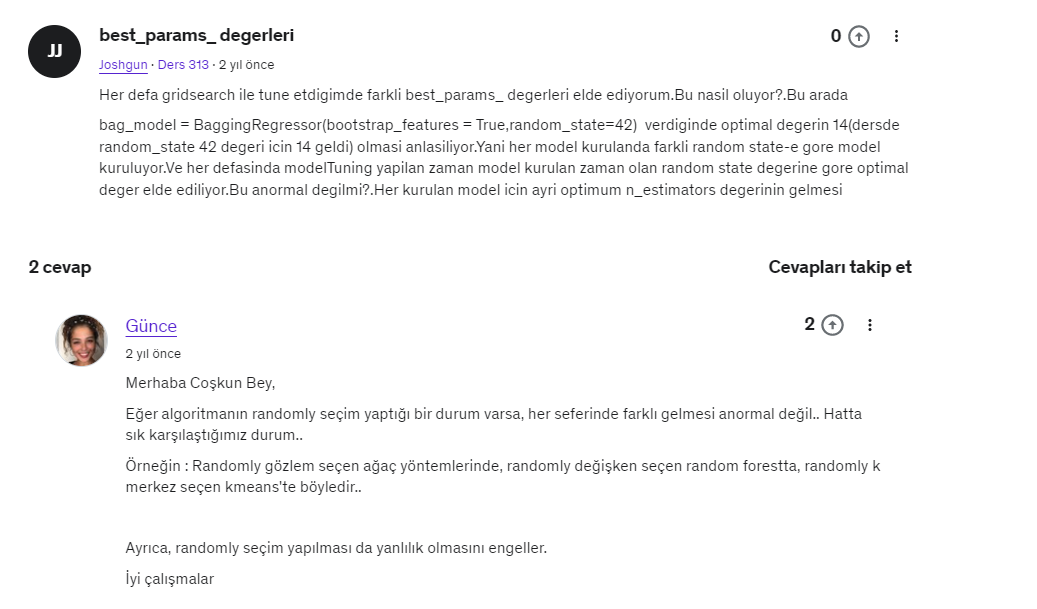

In [112]:
bag_tuned = BaggingRegressor(n_estimators=6, random_state = 42).fit(X_train,y_train)

In [113]:
np.sqrt(mean_squared_error(y_test,bag_tuned.predict(X_test)))

386.99184229309327

Valide edilmiş hata, ilkel hatadan fazla çıkabilir. Buna şaşırmamalısın. Zaten validation'un mantığı hatayı azaltmak değil en doğru sonucu vermek.

##RANDOM FOREST- RF

### Teori

Temeli, birden çok karar ağacının ürettiği tahminlerin biraraya getirilerek değerlendirilmesine dayanır. (Breiman 2001, evet yine) Çok karmaşık modeller ile basit modellerin arasındadır, bu yüzden de en ideal ağaç yapılarından biridir. Kullanım kolaylığı, algılanma kolaylığı, uygulanabilme(sistem entegrasyonları) kolaylığı... 

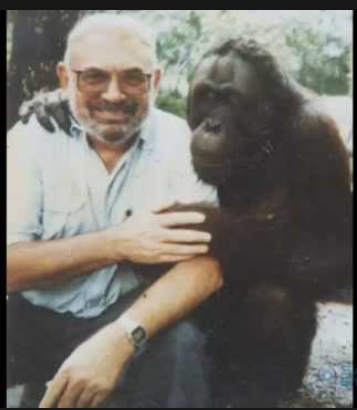

Bu kral abimiz 2005'te hayata gözlemlerini yumdu. O7

**Random Forest Özellikleri:**
* Bagging ile Random Subspace yöntemlerinin birleşiminden oluşur.
* Ağaçlar için _gözlemler_ bootstrap rastgele örnek seçim yöntemi ile; _değişkenler_ ise Random Subspace yöntemi ile seçilir. Zten hem gözlem hem de değişkenlerin rastgele seçimi bu yöntemi çok önemli kılmaktadır.
* Ağaç oluşturmada  veri setinin 2/3'ü kullanılır. Geri kalanı test ve değişken öneminin belrilenmesi için kullanılır.
* Her düğüm noktasında rastgele değişken seçimi yapılır. (Regresyonda p/3, Sınıflamada karekök p.)
* Karar ağacının her bir düğümünde en iyi dallara ayırıcı değişken, tüm değişkenler arasından rastgele seçilen  daha az sayıdaki değişken arasından seçilir. (Unutmaki en önemli deşkenler ağacın tepesinde olanlardır.)
* Nihai tahmin için ağaçlardan tahmin değerleri talep edilirken her bir ağacın daha öcne heseplanan hata oranları göz önüne alınarak ağaçlara ağırlık verilir. Ağaçların gözlemlerinin yanı sıra değişken atamalarını da kendi yapıyor. Yetmiyor, birden fazla ağaç oluşturup en iyisini seçiyor. Bu nasıl bir krallık yiğidim.

### Uygulama

#### 1.Model

In [114]:
from sklearn.ensemble import RandomForestRegressor

In [115]:
rf_model = RandomForestRegressor(random_state=42).fit(X_train,y_train) # daha önce split yaptığım için tekrar tekrar yapmaya gerek yok. Sıkıldım.

In [121]:
?RandomForestRegressor # adam defaultta 100 ağaç girmiş.

#### 2.Tahmin

In [122]:
np.sqrt(mean_squared_error(y_test,rf_model.predict(X_test)))

344.8191624908484

#### 3.Model Tuning

2 önemli hyper parametre var: Fit edilecek ağaç sayısı ve bölünmelerdeki değişken sayısı. MAx deerinlikte var ama ilk ikisi daha önemli.

In [123]:
rf_params = {"max_depth": list(range(1,10)),
             "max_features": [2,3,5,10,15],
             "n_estimators": [200,300,400,500,1000]     ##500, 1000 genelde rfde iyi çaışır. Makalelerde geneldede onalr kullanılır. Az gözlemlerde durum değişebilir.
             }

In [127]:
rf_model = RandomForestRegressor(random_state=42)
rf_cv_model = GridSearchCV(rf_model, rf_params, cv = 10, 
                           n_jobs = -1) # işlemci paralel çalışsında daha hızlı işlesin diye

Dersleri bitirdikten, biraz daha upper seviyeye eçtikten sonra CPU, GPU gibi işlem birimlerinin hız ve optimizasyonlarıyla ilgilenmeye balayacaksın.

In [128]:
rf_cv_model.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'max_features': [2, 3, 5, 10, 15],
                         'n_estimators': [200, 300, 400, 500, 1000]})

In [129]:
rf_cv_model.best_params_

{'max_depth': 8, 'max_features': 2, 'n_estimators': 200}

In [136]:
rf_tuned = RandomForestRegressor(max_depth= rf_cv_model.best_params_["max_depth"], max_features=rf_cv_model.best_params_["max_features"], n_estimators = rf_cv_model.best_params_["n_estimators"]).fit(X_train,y_train)

In [137]:
y_pred = rf_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

354.48277125722166

Değişkenlerin önem düzeyine erişmemiz gerektiği bir durum hayal edelim. Hatırlarsan değişkenin önemli olanları, ağacın tepesinde olanlardı. 

In [138]:
Importance = pd.DataFrame({"Importance" : rf_tuned.feature_importances_*100}, index = X_train.columns)

Text(0.5, 0, 'Değişken Önem Düzeyleri')

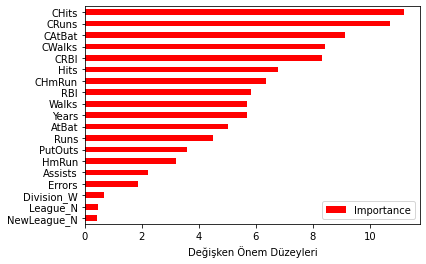

In [139]:
Importance.sort_values(by = "Importance", axis = 0, ascending = True).plot(
                                                                            kind="barh", 
                                                                            color = "r")
plt.xlabel("Değişken Önem Düzeyleri")

Mesela buradan önemsiz gördüğün değikenleri çıkarabilirsin. C ile başlayanlar büük ihtimalle ağaç tarafından bir dönüşüme tabi tutulanalr olabilir.

## GRADIENT BOOSTING MACHINES - GBM

### Teori

AdaBoost'un sınıflandırma ve regresyon problmlerine kolayca uyarlanabilen genelleştirilmiş versiyonudur. Artıklar üzerine tek bir tahminsel model formunda olan modeller serisi kurulur. (2001 Friedman) Bundan sonra ele alacağımız tüm ağaç modellerinin bir temeli gibi, frameworkü gibi bir konu. Ağaç yöntemlerinde Brieman'dan sonra devrimi getiren olaydır. Boosting ile optimizasyonu sağlar. 

**Boosting Yöntmlerine Giriş:**
* Zayıf öğrenicileri bir araya getirip güçlü bir öğrenici çıkarma fikrine dayanır (Kearns & Valiant 1990). Bu iki eleman yukarıdaki soruyu sorup ortaya bir tez atıyor.
* Atılan bu teze, 10 sene sonra Schapire ve Freund 1996-1999'da bir uygulama geliştiriyor: Adaptive Boosting / AdaBoost. AdaBoost: zayıf sınıflandırıcıların bir araya gelerek güçlü bir sınıflandırıcı oluşturması fikrini hayata geçiren algortimadır. 

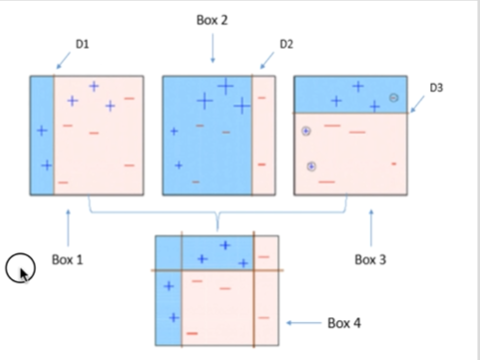

"Artıklar üzerine tek bir tahminsel model formunda olan modeller serisi" tabirinin ilk uyguanmaya başladığı yer AdaBoost Algoritmasıdır. Yukarıdaki bir sınıflandırma problemi ama sen regresyonuda tahmin edip anlarsın.

Tüm bunların ışığında GBM'in tanımını tekrar edelim: AdaBoost'un sınıflandırma ve regresyon problmlerine kolayca uyarlanabilen genelleştirilmiş versiyonudur. AdaBoost tek güçlü bir öğrenici oluşturmada çok iyi ama tek bir cost fonksiyonu var. İşte bu bir doğrusal model oluşturmak için ffarklı link fonksiyonlarının adapte edilmesinin zor olduğu nlamına geliyor.

İşte Friedman burada, Bagging Metodolojisi-AdaBoost MEtodolojisi-Bringman'ın "Boosting, artıkların optimizasyonu problemidir" fikrini alıp harmanlayarak GBM'i ortaya çıkarıyor. 

Uygun bir cost fonksiyonu üzerinde çalışan bir optimizasyon algoritması özetle.

**GBM Özellikler:**
* Gradient Boosting, tek bir tahminsel model formunda olan modeller serisi oluşturur.
* Seri içerisindeki bir model, serideki bir önceki modelin tahmin artıklarının/hatalarının (residuals) üzerine kurularak (fit) oluşturulur. RF'de ise ayrı ayrı oluşuyordu.
* GBM, diferansiyellenebilen (türevi alınabilen) herhangi bir kayıp fonksiyonunu optimize edebilen Gradient Descent algoritmasını kullanmakta.
* GB bir çok temel öğrenici tipi (base learner type) kullanabilir. (Trees, linear terms, splines...) 
* Cost fonksiyonları ve link fonksiyonları modifiye edilebilirdir.
* Boosting + Gradient Descent  

GBM bizim için: Bagging, AdaBoost gibi bir mihenk taşı. Tüm ağaç ve lineer yöntemlerin, bugüne kadar gelen yapısında hepsini ölçeklendirebilen teorik bir framework olarak kalsın kafanda. Bundan sonra ele alacağımız ağaçlar, bunun üzerine inşa edilmiş, performans arttırmaları sağlanmıştır.

### Uygulama

#### 1.Model

In [140]:
from sklearn.ensemble import GradientBoostingRegressor 

In [141]:
gbm_model = GradientBoostingRegressor().fit(X_train,y_train)

GBM algoritmaları hem ağaca dayalı bir yöntem hemde lineer bir yöntem olabilir. Biz bu ve sonraki derslerde ağaca dayalı olanı göreceğiz.

#### 2.Tahmin

In [142]:
## adettendir ilkel test hatasına bakalım
np.sqrt(mean_squared_error(y_test,gbm_model.predict(X_test)))

342.9317908992801

#### 3.Model Tuning

In [143]:
gbm_params = {
    "learning_rate":[0.001, 0.01, 0.1, 0.2],
    "max_depth":[3,5,8,50,100],
    "n_estimators":[200,500,1000,2000],
    "subsample":[1,0.5,0.75]
}

In [144]:
gbm_model = GradientBoostingRegressor()
gbm_cv_model = GridSearchCV(gbm_model, gbm_params, cv=10,
                            n_jobs=-1, 
                            verbose = 2) #iterasyonları gözlemleme ile ilgili
          

gbm_cv_model.fit(X_train,y_train)

Fitting 10 folds for each of 240 candidates, totalling 2400 fits


GridSearchCV(cv=10, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 8, 50, 100],
                         'n_estimators': [200, 500, 1000, 2000],
                         'subsample': [1, 0.5, 0.75]},
             verbose=2)

In [145]:
gbm_cv_model.best_params_

{'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.75}

In [146]:
gbm_tuned = GradientBoostingRegressor(learning_rate = gbm_cv_model.best_params_["learning_rate"],
                                       max_depth = gbm_cv_model.best_params_["max_depth"],
                                       n_estimators = gbm_cv_model.best_params_["n_estimators"],
                                       subsample = gbm_cv_model.best_params_["subsample"])
gbm_tuned.fit(X_train, y_train)
np.sqrt(mean_squared_error(y_test,gbm_tuned.predict(X_test)))

323.29578168500876

In [147]:
Importance = pd.DataFrame({"Importance": gbm_tuned.feature_importances_*100},
                         index = X_train.columns)

Text(0.5, 0, 'Değişken Önem Düzeyleri')

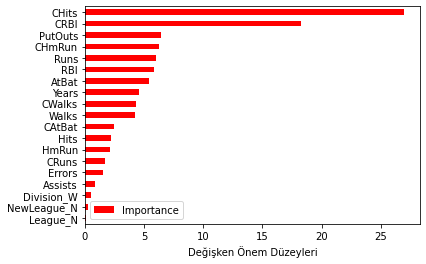

In [148]:
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Değişken Önem Düzeyleri")

## XGBOOST (Extrme Gradient Boosting)

### Teori

Kaggle yarışmalarından ve başarılı sonuçlarından tanınıyor. Kaggle yarışmalarında kullanmak için fena bir şeydir. Tianqi Chen(2014)

XGBoost, GBM'in hız ve tahmin performansını arttırmak üzere optimize edilmiş; ölçeklenebilir ve farklı platformlara(hadoop,spark vs vs.) entegre edilebilir halidir. 

LightGBM(Microsof) ve CatBoost(Yandex), XGBoost'a karşı çıkarılmış ve dha hızlı olduğunu iddia eden yöntemlerdir. Yani ileriki konularda da anlamak daha kolay olacak. LightGBM gerçektende XGBoostan iyi ama farklı platformalra entegre edilmesi ve alışkanlık kazanılmasından dolayı hala çokça kullanılıyor.

Veri setlerinin boyutu, karmaşıklğı arttığında tahmin süresi uzasada başarı oranında bizi mutlu eden bir algoritmadır.

**XGBoost ÖZellikler:**
* R, Python, Julia, Scala, Hadoop, Spark ile beraber kullanılabilir.
* Ölçeklenebilirdir.
* Hızlıdır.
* Tahmin başarısı yüksektir.
* Bir çok kaggle yarışmasında başarısını kanıtlamıştır.

### Uygulama

#### 1.Model

In [149]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [150]:
import xgboost as xgb

Kütüphanenin geliştiricisinin notu: Pandas DataFrame ya da Numpy serileri kullanmak yerne, kütüphanenin kendi veri yapılarını kullanırsan daha hızlı sonuç alırsın.

In [151]:
DM_train = xgb.DMatrix(data = X_train, label = y_train)
DM_test = xgb.DMatrix(data = X_test, label = y_test)

In [153]:
from xgboost import XGBRegressor

In [154]:
xgb_model = XGBRegressor().fit(X_train,y_train)   #istersen DM_leri kullanabilrsin ama genelde hata çok çıkıyor ve bunlarla uğraşman gerek.

[09:22:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


#### 2.Tahmin

In [155]:
## Allahın emriyle ilkel test hatamız
np.sqrt(mean_squared_error(y_test, xgb_model.predict(X_test)))

359.91750599447033

#### 3.Model Tuning

In [156]:
?xgb_model

In [157]:
xgb_grid = {
     'colsample_bytree': [0.4, 0.5,0.6,0.9,1],    # AĞAÇ BAŞINA DEĞİŞKENLERDEN ALNACAK ÖRNEK ORANI
     'n_estimators':[100, 200, 500],              # ağaç sayısı
     'max_depth': [2,3,4,5,6],                    # ağaç derinliği
     'learning_rate': [0.1, 0.01, 0.5]           # adım boyutu
}


In [158]:
xgb = XGBRegressor()

xgb_cv = GridSearchCV(xgb, 
                      param_grid = xgb_grid, 
                      cv = 10, 
                      n_jobs = -1,
                      verbose = 2)


xgb_cv.fit(X_train, y_train)

Fitting 10 folds for each of 225 candidates, totalling 2250 fits
[09:27:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=10, estimator=XGBRegressor(), n_jobs=-1,
             param_grid={'colsample_bytree': [0.4, 0.5, 0.6, 0.9, 1],
                         'learning_rate': [0.1, 0.01, 0.5],
                         'max_depth': [2, 3, 4, 5, 6],
                         'n_estimators': [100, 200, 500]},
             verbose=2)

In [160]:
xgb_cv.best_params_

{'colsample_bytree': 0.6,
 'learning_rate': 0.1,
 'max_depth': 2,
 'n_estimators': 500}

In [161]:
xgb_tuned = XGBRegressor(colsample_bytree = xgb_cv.best_params_["colsample_bytree"], 
                         learning_rate = xgb_cv.best_params_["learning_rate"], 
                         max_depth = xgb_cv.best_params_["max_depth"], 
                         n_estimators = xgb_cv.best_params_["n_estimators"]) 

xgb_tuned = xgb_tuned.fit(X_train,y_train)

[09:28:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [162]:
y_pred = xgb_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

353.04727214609073

## LIGTHGBM

### Teori

XGBoost'un eğitim süresi performansını arttırmaya yönelik geliştirilen bir diğer GBM türüdür. (Microsoft 2017, açık kaynak)
* Daha performanslı
* Level-wise büyüme stratejisi yerine Leaf-wise büyüme stratejisi
* Breadth-First Search (BFS) yerine Depth-First-Search(DFS)

SXBoost, c++ ile yazılmış olmasına rağmen eğitim süresi zaman almaktadır. LightGBM ise yuakrıdaki stratejileri ve farklı split etme işlemleri kullanarak daha hızlı hale getirmiştir.

XGBoost, değişkenleri ayırmak ve farklı bölme noktalarını araştırmak/keşfetmek için karar ağaçlarını kullanıyor bunada Level-wise deniyor.

LightGBM daha iyi fit edebilmek için splitlere odaklanıyor bunada Leaf-wise stratejisi deniyor.

#### 2. Model

In [163]:
!pip install lightgbm

'''
eğer yukarıdaki tutmazsa 
conda install -c conda-forge lightgbm

buda olmuyorsa stackoverflow





yükledikten sonra baştan başlatıcaksın 
Microsoft....
'''

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


'\neğer yukarıdaki tutmazsa \nconda install -c conda-forge lightgbm\n\nbuda olmuyorsa stackoverflow\n\n\n\n\n\nyükledikten sonra baştan başlatıcaksın \nMicrosoft....\n'

In [165]:
from lightgbm import LGBMRegressor

In [166]:
lgbm = LGBMRegressor()
lgbm_model = lgbm.fit(X_train,y_train)

#### 2.Tahmin

In [167]:
y_pred = lgbm_model.predict(X_test, num_iteration = lgbm_model.best_iteration_)
np.sqrt(mean_squared_error(y_test, y_pred))

363.8712087611089

#### 3.Model Tuning

In [168]:
lgbm_grid = {
    'colsample_bytree': [0.4, 0.5,0.6,0.9,1],
    'learning_rate': [0.01, 0.1, 0.5,1],
    'n_estimators': [20, 40, 100, 200, 500,1000],
    'max_depth': [1,2,3,4,5,6,7,8] }

lgbm = LGBMRegressor()
lgbm_cv_model = GridSearchCV(lgbm, lgbm_grid, cv=10, n_jobs = -1, verbose = 2)

In [169]:
lgbm_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 960 candidates, totalling 9600 fits


GridSearchCV(cv=10, estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'colsample_bytree': [0.4, 0.5, 0.6, 0.9, 1],
                         'learning_rate': [0.01, 0.1, 0.5, 1],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
                         'n_estimators': [20, 40, 100, 200, 500, 1000]},
             verbose=2)

In [170]:
lgbm_cv_model.best_params_

{'colsample_bytree': 0.4,
 'learning_rate': 0.1,
 'max_depth': 6,
 'n_estimators': 20}

In [171]:
lgbm_tuned = LGBMRegressor(learning_rate = lgbm_cv_model.best_params_["learning_rate"], 
                           max_depth = lgbm_cv_model.best_params_["max_depth"], 
                           n_estimators = lgbm_cv_model.best_params_["n_estimators"],
                          colsample_bytree = lgbm_cv_model.best_params_["colsample_bytree"])

lgbm_tuned = lgbm_tuned.fit(X_train,y_train)

In [172]:
y_pred = lgbm_tuned.predict(X_test)

In [173]:
np.sqrt(mean_squared_error(y_test, y_pred))

378.960437342183

## CATBOOST 

### Teori

Category Boosting(CatBoost), kategorik değişkenler ile otomatik olarak mücadele edebilen hızlı, başarılı bir diğer GBM türüdür.(Yandex 2017) Vahit hocanın incelemelerini aklında tut.

**CatBoost ÖZllikler:**
* Kategorik değişken desteği
* Hızlı ve ölçeklenebilir GPU desteği 
* Daha başarılı tahminler
* Hızlı train ve hızlı tahmin
* Rusyanın açık kaynak kodlu, başarılı ilk ML çalışması

### Uygulama

#### 1.Model

In [174]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 9.5 MB/s eta 0:00:00


In [175]:
from catboost import CatBoostRegressor

In [176]:
catb = CatBoostRegressor()
catb_model = catb.fit(X_train, y_train)

Learning rate set to 0.031674
0:	learn: 437.6430699	total: 49.9ms	remaining: 49.9s
1:	learn: 431.3923642	total: 52ms	remaining: 26s
2:	learn: 424.8820360	total: 54.4ms	remaining: 18.1s
3:	learn: 418.2514904	total: 56.9ms	remaining: 14.2s
4:	learn: 412.6394021	total: 59.2ms	remaining: 11.8s
5:	learn: 406.6247020	total: 61.5ms	remaining: 10.2s
6:	learn: 400.5321206	total: 64ms	remaining: 9.07s
7:	learn: 394.6683437	total: 66.5ms	remaining: 8.24s
8:	learn: 388.2496484	total: 69ms	remaining: 7.59s
9:	learn: 382.9448842	total: 71.5ms	remaining: 7.08s
10:	learn: 377.2600080	total: 74.5ms	remaining: 6.7s
11:	learn: 372.4829606	total: 77.1ms	remaining: 6.34s
12:	learn: 366.6823437	total: 79.5ms	remaining: 6.04s
13:	learn: 362.6076230	total: 82ms	remaining: 5.78s
14:	learn: 358.0107745	total: 84.4ms	remaining: 5.54s
15:	learn: 353.2802665	total: 87ms	remaining: 5.35s
16:	learn: 348.5646265	total: 89.5ms	remaining: 5.18s
17:	learn: 343.6407912	total: 92.1ms	remaining: 5.03s
18:	learn: 339.236384

#### 2.Tahmin

In [177]:
y_pred = catb_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

351.194631344607

#### 3.Model Tuning

In [178]:
catb_grid = {
    'iterations': [200,500,1000,2000],
    'learning_rate': [0.01, 0.03, 0.05, 0.1],
    'depth': [3,4,5,6,7,8] }

In [179]:
catb = CatBoostRegressor()
catb_cv_model = GridSearchCV(catb, catb_grid, cv=5, n_jobs = -1, verbose = 2)

In [181]:
catb_cv_model.fit(X_train, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
0:	learn: 422.4143448	total: 2.62ms	remaining: 2.61s
1:	learn: 404.1864276	total: 4.05ms	remaining: 2.02s
2:	learn: 386.3231718	total: 5.31ms	remaining: 1.76s
3:	learn: 370.5548032	total: 6.5ms	remaining: 1.62s
4:	learn: 354.9242038	total: 7.65ms	remaining: 1.52s
5:	learn: 342.3403984	total: 8.89ms	remaining: 1.47s
6:	learn: 328.2370070	total: 10.6ms	remaining: 1.5s
7:	learn: 317.5056526	total: 12.2ms	remaining: 1.51s
8:	learn: 306.6243511	total: 13.7ms	remaining: 1.51s
9:	learn: 297.3147023	total: 15.4ms	remaining: 1.52s
10:	learn: 288.3685892	total: 16.7ms	remaining: 1.5s
11:	learn: 281.0996220	total: 18.4ms	remaining: 1.51s
12:	learn: 273.2254898	total: 20.1ms	remaining: 1.53s
13:	learn: 266.9003385	total: 21.7ms	remaining: 1.53s
14:	learn: 261.9092500	total: 23.2ms	remaining: 1.53s
15:	learn: 256.2637350	total: 24.7ms	remaining: 1.52s
16:	learn: 250.3667935	total: 26.6ms	remaining: 1.54s
17:	learn: 244.8631098	total: 28.

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostRegressor object at 0x7fc3a2568490>,
             n_jobs=-1,
             param_grid={'depth': [3, 4, 5, 6, 7, 8],
                         'iterations': [200, 500, 1000, 2000],
                         'learning_rate': [0.01, 0.03, 0.05, 0.1]},
             verbose=2)

In [182]:
catb_cv_model.best_params_

{'depth': 5, 'iterations': 1000, 'learning_rate': 0.1}

In [183]:
catb_tuned = CatBoostRegressor(iterations = catb_cv_model.best_params_["iterations"], 
                               learning_rate = catb_cv_model.best_params_["learning_rate"], 
                               depth = catb_cv_model.best_params_["depth"])

catb_tuned = catb_tuned.fit(X_train,y_train)

0:	learn: 422.4143448	total: 1.61ms	remaining: 1.61s
1:	learn: 404.1864276	total: 3.84ms	remaining: 1.92s
2:	learn: 386.3231718	total: 8.16ms	remaining: 2.71s
3:	learn: 370.5548032	total: 10.8ms	remaining: 2.68s
4:	learn: 354.9242038	total: 13.4ms	remaining: 2.66s
5:	learn: 342.3403984	total: 15.7ms	remaining: 2.6s
6:	learn: 328.2370070	total: 17ms	remaining: 2.41s
7:	learn: 317.5056526	total: 18.6ms	remaining: 2.31s
8:	learn: 306.6243511	total: 20.1ms	remaining: 2.22s
9:	learn: 297.3147023	total: 21.7ms	remaining: 2.14s
10:	learn: 288.3685892	total: 23.3ms	remaining: 2.09s
11:	learn: 281.0996220	total: 24.8ms	remaining: 2.04s
12:	learn: 273.2254898	total: 26.2ms	remaining: 1.99s
13:	learn: 266.9003385	total: 27.6ms	remaining: 1.95s
14:	learn: 261.9092500	total: 29.1ms	remaining: 1.91s
15:	learn: 256.2637350	total: 30.4ms	remaining: 1.87s
16:	learn: 250.3667935	total: 31.9ms	remaining: 1.84s
17:	learn: 244.8631098	total: 33.4ms	remaining: 1.82s
18:	learn: 240.1540669	total: 34.8ms	rema

In [184]:
y_pred = catb_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

356.665762904938

## Notes

For Cost Func:
https://www.javatpoint.com/cost-function-in-machine-learning

For Link Func:
https://towardsdatascience.com/generalized-linear-models-9cbf848bb8ab